In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [59]:
# Load the dataset
data = pd.read_csv('animal_dataset.csv')
data.head()

,hair,scales,feather,moist skin,sexual reproduction,asexual reproduction,vivipirous,oviparous,hard-shelled eggs,soft eggs,...,antennae,tail,venomous,aquatic,terrestrial,airborne,asymmetrical,symmetrical,Class,Name
0,0,0,0,1,1,0,0,1,0,1,...,0,1,0,1,0,0,0,1,Amphibians,african clawed flog
1,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,black toad
2,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,boreal toad
3,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,bronze frog
4,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,Amphibians,cane toad


In [60]:
# Split into features and target variable
X = data.drop(['Class', 'Name'], axis=1)
y = data['Class']

In [61]:
# Convert categorical labels into numerical values
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F-measure: 1.0
Confusion Matrix:



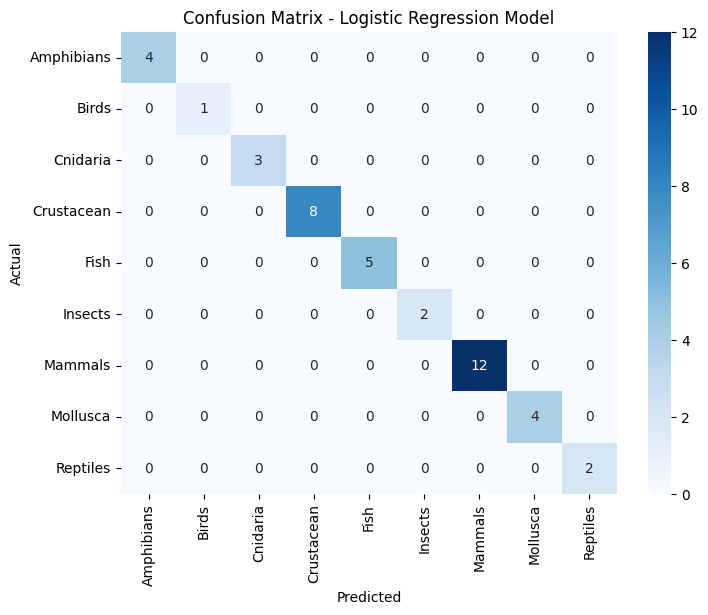

In [63]:
conf_matrix = confusion_matrix(y_test, log_reg_predictions)
accuracy = accuracy_score(y_test, log_reg_predictions)
precision = precision_score(y_test, log_reg_predictions, average='weighted')
recall = recall_score(y_test, log_reg_predictions, average='weighted')
f_measure = f1_score(y_test, log_reg_predictions, average='weighted')

print("Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f_measure)

# Display the confusion matrix as a plot
print("Confusion Matrix:\n")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()